In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor
from utils import *
import os

In [2]:
img_path = 'Images'
img_name = 'GSR'
img_suffix = '.jpg'
os.makedirs('result/' + img_name, exist_ok=True)

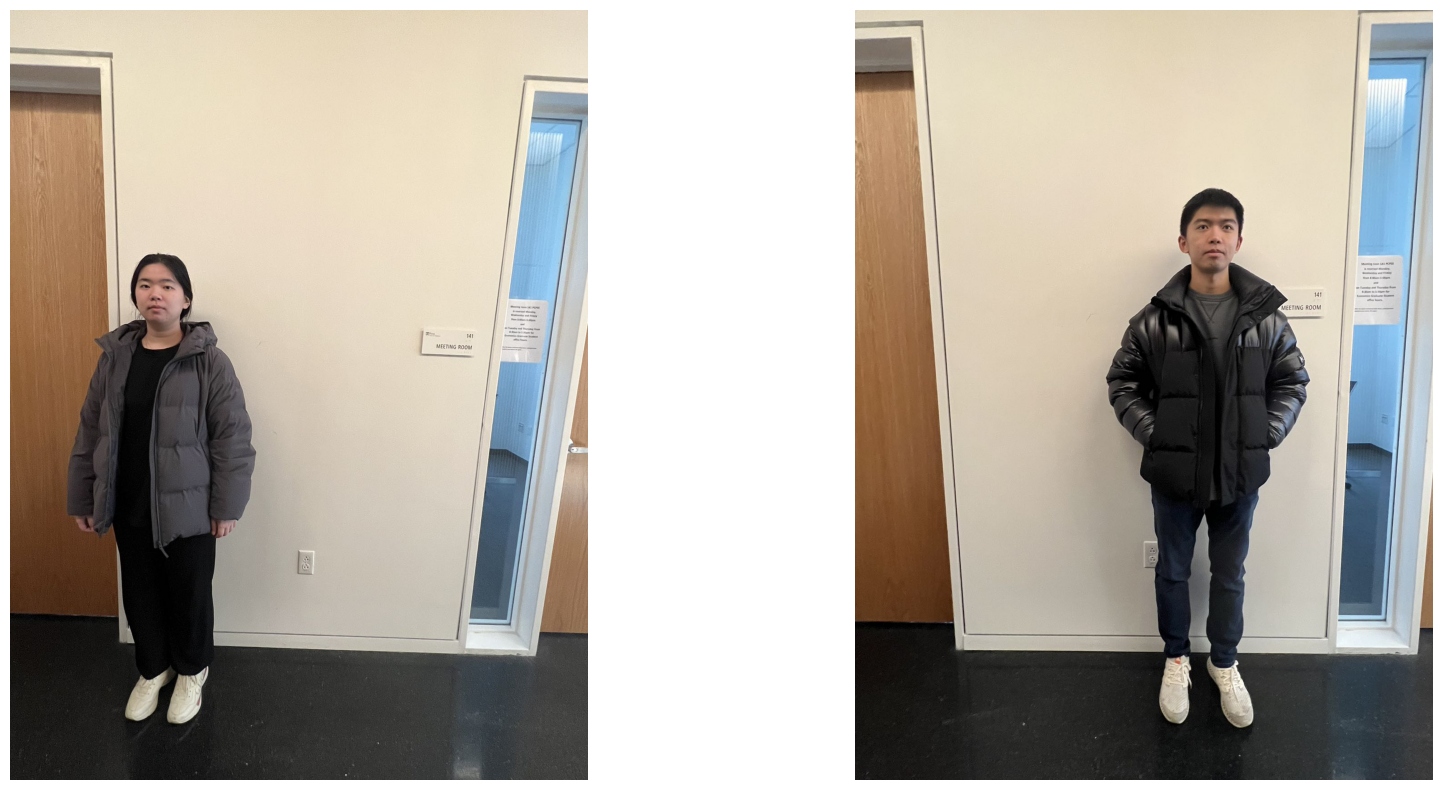

In [3]:
img1 = cv2.imread(img_path + '/' + img_name + '_1' + img_suffix)
img2 = cv2.imread(img_path + '/' + img_name + '_2' + img_suffix)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
_, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(img1)
axs[0].set_axis_off()
axs[1].imshow(img2)
axs[1].set_axis_off()
plt.show()

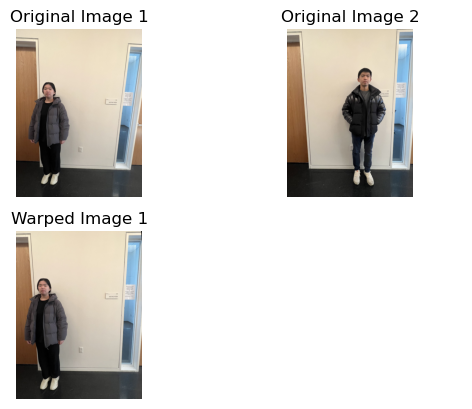

In [4]:
H = findHomography(img1, img2, showMatches=True, filePath='result/' + img_name)
_, axs = plt.subplots(2, 2)
axs[0, 0].imshow(img1)
axs[0, 0].set_axis_off()
axs[0, 0].set_title("Original Image 1")
axs[0, 1].imshow(img2)
axs[0, 1].set_axis_off()
axs[0, 1].set_title("Original Image 2")
axs[1, 0].imshow(cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0])))
axs[1, 0].set_axis_off()
axs[1, 0].set_title("Warped Image 1")
plt.axis('off')
plt.savefig(f'result/{img_name}/homography.jpg')

(-0.5, 1279.5, 1706.5, -0.5)

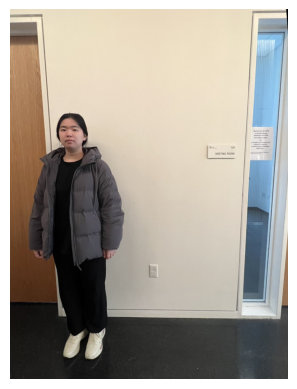

In [5]:
warped_img1 = cv2.warpPerspective(img1, H, (img1.shape[1], img1.shape[0]))
cv2.imwrite(f'result/{img_name}/warped_img1.jpg', cv2.cvtColor(warped_img1, cv2.COLOR_RGB2BGR))
plt.imshow(warped_img1)
plt.axis('off')

[ 103  360  586 1694]


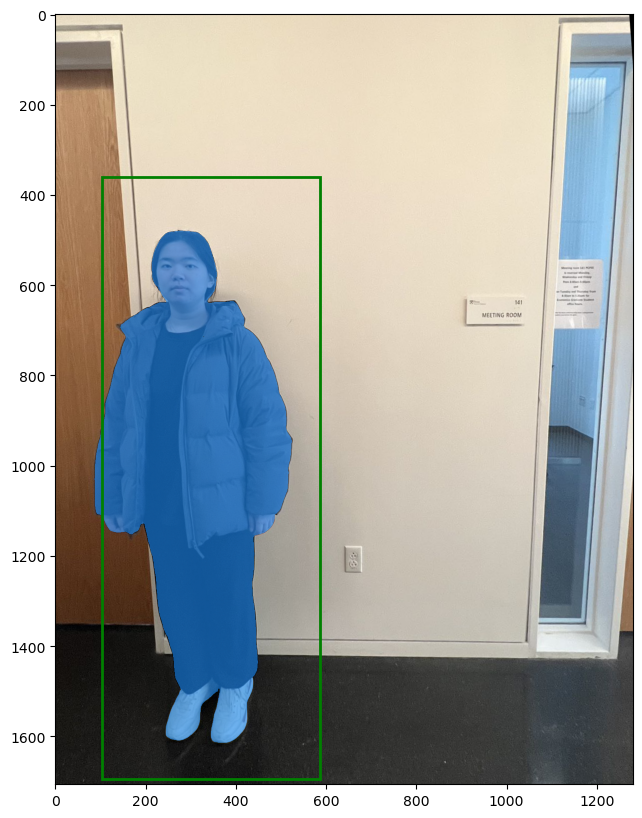

In [6]:
bbox = findBoundingBox(warped_img1, winStride=(10, 10), scale=1.05)
print(bbox)
# mask = findMask(warped_img1, bbox)
# mask = mask[0]
# np.save('tmp/mask.npy', mask[0])
# np.save('tmp/bbox.npy', bbox)
mask = np.load('tmp/mask.npy')
bbox = np.load('tmp/bbox.npy')
plt.figure(figsize=(10, 10))
plt.imshow(warped_img1)
plt_mask(mask, plt.gca())
plt_bbox(bbox, plt.gca())
plt.savefig(f'result/{img_name}/bbox&mask.jpg')
plt.show()

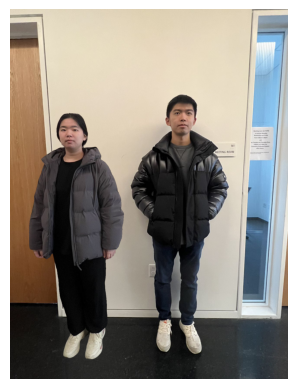

In [7]:
new_img = maskTransfer(warped_img1, img2, mask)
cv2.imwrite(f'result/{img_name}/new_img.jpg', cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR))
plt.imshow(new_img)
plt.axis('off')
plt.show()   

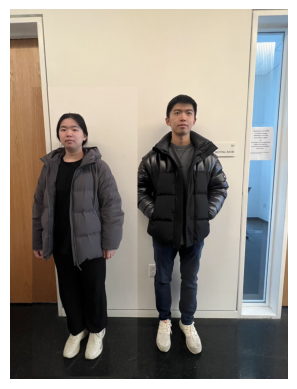

In [8]:
new_img2 = bboxTransfer(warped_img1, img2, bbox)
cv2.imwrite(f'result/{img_name}/new_img2.jpg', cv2.cvtColor(new_img2, cv2.COLOR_RGB2BGR))
plt.imshow(new_img2)
plt.axis('off')
plt.show()

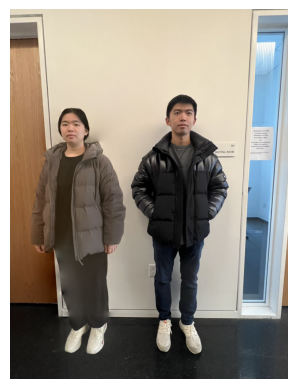

In [9]:
new_img3 = poissonBlending(warped_img1, img2, mask)
cv2.imwrite(f'result/{img_name}/new_img3.jpg', cv2.cvtColor(new_img3, cv2.COLOR_RGB2BGR))
plt.imshow(new_img3)
plt.axis('off')
plt.show()

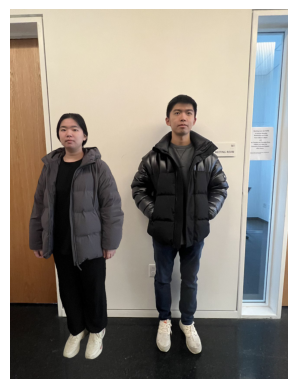

In [11]:
new_img4 = gaussianMaskBlending(warped_img1, img2, mask)
cv2.imwrite(f'result/{img_name}/new_img4.jpg', cv2.cvtColor(new_img4, cv2.COLOR_RGB2BGR))
plt.imshow(new_img4)
plt.axis('off')
plt.show()